In [95]:
# 모듈 호출
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd

In [96]:
data = pd.read_csv('./continue_two_days_rate_delete.csv')
data

,name,mon_tue,tue_wed,wed_thu,thu_fri,fri_sat,sat_sun
0,01d1ad9a-7477-4d69-9a24-9e64a2d96eb7,3.619658,-8.747239,21.522927,-19.483809,0.494787,3.485142
1,03f65249-8a7d-4bfe-845d-c70ae39d2c9f,31.623932,12.306984,-40.578193,70.732455,-64.795369,0.497132
2,06434818-6953-44c5-87a3-890f7676d7ab,16.715493,40.368617,-10.519593,-26.007765,-29.006868,49.576087
3,0744bc3d-fb06-48f3-85f4-89af0b24dc0d,6.294574,0.831389,20.201070,42.222757,15.962938,-59.644642
4,0e409b44-467b-4169-8629-b7c1d7439609,-24.685013,4.446401,-6.631542,2.023926,-61.887906,-33.223684
...,...,...,...,...,...,...,...
216,ea2ab1b1-6e8a-4f74-899f-0c403f7949d2,5.765955,13.707195,42.991627,-55.033792,-9.050272,1.795000
217,ec980c72-24b8-49d3-a6b3-75bf1b90b7b3,-21.333198,37.632335,-7.997260,-28.040483,13.895291,-58.819642
218,f5c8e00c-99fa-46e3-ad32-40e2f4eb34ae,66.080349,-9.252277,23.855095,21.876296,-14.609556,-8.782732
219,fac8e4da-f896-46e2-a652-08a97cfaf4ee,10.362632,-18.793748,-32.352284,14.854427,103.753521,-40.705843


In [101]:
fm._rebuild()
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'KoPub' in f.name] # 폰트 검색

[('KoPubDotum Light',
  'C:\\Users\\oym91\\AppData\\Local\\Microsoft\\Windows\\Fonts\\KoPubDotumLight.ttf'),
 ('KoPubDotum Bold',
  'C:\\Users\\oym91\\AppData\\Local\\Microsoft\\Windows\\Fonts\\KoPubDotumBold.ttf'),
 ('KoPubDotum Medium',
  'C:\\Users\\oym91\\AppData\\Local\\Microsoft\\Windows\\Fonts\\KoPubDotumMedium.ttf')]

In [102]:
sns.set(style='whitegrid', font='KoPubDotum Medium', font_scale=1.2)  # Seaborn 설정

In [103]:
X = data.iloc[:, [1,2]].values # mon-tue & tue-wed
#X = data.iloc[:, [2,3]].values # tue-wed & wed-thu
#X = data.iloc[:, [3,4]].values # wed-thu & thu-fri
#X = data.iloc[:, [4,5]].values # thu-fri & fri-sat
#X = data.iloc[:, [5,6]].values # fri-sat & sat-sun

X.shape
m = X.shape[0] # 227
n = X.shape[1] # 2

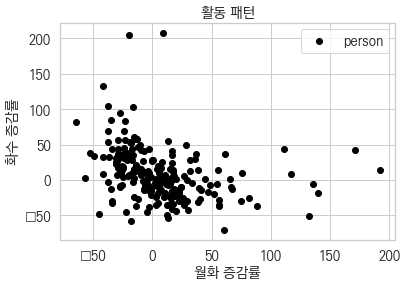

In [104]:
plt.scatter(X[:,0],X[:,1],c='black',label='person')
plt.xlabel('월화 증감률')
plt.ylabel('화수 증감률')
plt.legend()
plt.title('활동 패턴')
plt.show()

In [117]:
K=5 # 클러스터 개수
n_iter=100 # 반복 횟수

Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
Centroids # shape=(2, 0)

array([], shape=(2, 0), dtype=float64)

In [118]:
for i in range(K): # 0, 1, 2
    rand=rd.randint(0,m-1) # 0과 21 사이 난수 생성
    Centroids=np.c_[Centroids,X[rand]] # 클러스터 중심(열) 추가
Centroids # K개 클러스터 중심 초기값. shape=(2, 3)

Output={} # 출력값 초기화(딕셔너리)

In [119]:
# 유클리드 거리 초기화
EuclidianDistance=np.array([]).reshape(m,0)
EuclidianDistance # shape=(227, 0)

array([], shape=(221, 0), dtype=float64)

In [120]:
Centroids[:,0] # shape=(227,)
# 넘파이 브로드캐스트(broadcast): 형상이 다른 배열끼리도 계산 가능
# (227, 2) 행렬 A에서 (2,) 벡터 값을 차감하면, 벡터 값은 (227, 2) 행렬로 확대된 후 연산
tempDist = np.sum((X-Centroids[:,0])**2,axis=1)
tempDist # shape=(227,)

array([6.63484357e+01, 1.84568338e+03, 3.41062179e+03, 3.14768798e+02,
       9.24839066e+02, 3.91198779e+01, 3.18093309e+03, 3.04544954e+02,
       1.61200167e+01, 3.36554019e+03, 4.85091419e+04, 2.61685122e+02,
       6.04624623e+03, 3.57177231e+02, 8.12969677e+01, 2.63610382e+03,
       1.82393487e+03, 6.13703144e+03, 3.83496163e+04, 4.10579201e+03,
       4.77245499e+03, 5.74753069e+03, 5.65688814e+03, 7.17315224e+02,
       1.90902212e+03, 1.19534341e+03, 3.73313953e+02, 1.27573430e+03,
       4.69661058e+03, 8.11558553e+02, 4.83210918e+03, 1.73480021e+03,
       1.70908496e+03, 8.48735756e+02, 2.42278938e+02, 4.27883233e+02,
       8.28404216e+02, 8.53205658e+03, 2.83355211e+03, 2.81963903e+03,
       4.09266045e+03, 1.28658181e+03, 1.36820690e+03, 1.70565456e+03,
       2.08770707e+02, 1.14746241e+02, 2.80196346e+02, 1.34143806e+03,
       1.30035478e+03, 4.69907157e+03, 2.45249432e+03, 3.46418752e+02,
       1.27614446e+03, 5.02658061e+02, 5.60203833e+02, 1.64826780e+03,
      

In [121]:
np.c_[EuclidianDistance,tempDist] # (227, 0) 행렬에 (227,) 옆으로 붙이기

array([[6.63484357e+01],
       [1.84568338e+03],
       [3.41062179e+03],
       [3.14768798e+02],
       [9.24839066e+02],
       [3.91198779e+01],
       [3.18093309e+03],
       [3.04544954e+02],
       [1.61200167e+01],
       [3.36554019e+03],
       [4.85091419e+04],
       [2.61685122e+02],
       [6.04624623e+03],
       [3.57177231e+02],
       [8.12969677e+01],
       [2.63610382e+03],
       [1.82393487e+03],
       [6.13703144e+03],
       [3.83496163e+04],
       [4.10579201e+03],
       [4.77245499e+03],
       [5.74753069e+03],
       [5.65688814e+03],
       [7.17315224e+02],
       [1.90902212e+03],
       [1.19534341e+03],
       [3.73313953e+02],
       [1.27573430e+03],
       [4.69661058e+03],
       [8.11558553e+02],
       [4.83210918e+03],
       [1.73480021e+03],
       [1.70908496e+03],
       [8.48735756e+02],
       [2.42278938e+02],
       [4.27883233e+02],
       [8.28404216e+02],
       [8.53205658e+03],
       [2.83355211e+03],
       [2.81963903e+03],


In [122]:
for k in range(K): # 0, 1, 2
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
EuclidianDistance # shape=(227, 3)

array([[   66.34843569,   559.0699563 ,   707.43746707,  1766.90295702,
          882.89998013],
       [ 1845.68338488,  2709.23256026,   168.4978493 ,  5078.2890175 ,
         2144.89404105],
       [ 3410.62178666,  5428.74568029,  1807.87025642,  4863.9474036 ,
         1641.0255051 ],
       ...,
       [ 4591.53046193,  4277.24547093,  1463.66556136, 10873.92522123,
         7087.57793093],
       [  152.24766204,   213.84481618,   681.54189923,  2592.63624018,
         1746.57915886],
       [ 1877.81806809,  3337.33573992,   748.38862007,  3734.55922141,
         1077.15857834]])

In [123]:
# 유클리드 거리가 최소가 되는 색인
np.argmin(EuclidianDistance,axis=1)

# K 클러스터 저장
C=np.argmin(EuclidianDistance,axis=1)+1
C # shape=(227,)

array([1, 3, 5, 1, 5, 1, 3, 1, 1, 5, 5, 1, 3, 2, 1, 5, 3, 5, 3, 5, 3, 5,
       5, 4, 5, 2, 3, 2, 4, 2, 5, 2, 2, 2, 1, 3, 3, 3, 5, 5, 3, 5, 4, 5,
       1, 1, 1, 2, 5, 3, 5, 2, 5, 2, 3, 3, 2, 1, 5, 5, 4, 4, 3, 5, 3, 5,
       3, 3, 5, 3, 5, 5, 5, 5, 5, 2, 4, 3, 5, 5, 3, 3, 3, 2, 3, 5, 5, 5,
       3, 5, 5, 5, 3, 2, 5, 2, 3, 3, 5, 1, 3, 3, 5, 5, 3, 3, 5, 3, 3, 5,
       2, 3, 5, 5, 3, 1, 5, 3, 2, 1, 5, 2, 1, 3, 5, 2, 3, 5, 2, 3, 4, 1,
       4, 3, 1, 5, 5, 5, 5, 2, 5, 5, 2, 2, 5, 5, 5, 5, 4, 5, 5, 5, 3, 5,
       5, 2, 3, 5, 3, 4, 5, 1, 5, 5, 5, 4, 5, 1, 2, 5, 3, 3, 3, 1, 3, 4,
       3, 2, 5, 1, 5, 4, 5, 2, 5, 3, 1, 5, 1, 5, 5, 3, 3, 5, 1, 3, 1, 5,
       3, 5, 3, 5, 1, 5, 2, 5, 3, 5, 5, 1, 3, 5, 2, 5, 3, 5, 5, 5, 3, 1,
       3], dtype=int64)

In [124]:
Y={} # 출력값 임시 딕셔너리

for k in range(K): # 0, 1, 2, 3
    Y[k+1]=np.array([]).reshape(2,0) # 특징 개수
Y

{1: array([], shape=(2, 0), dtype=float64),
 2: array([], shape=(2, 0), dtype=float64),
 3: array([], shape=(2, 0), dtype=float64),
 4: array([], shape=(2, 0), dtype=float64),
 5: array([], shape=(2, 0), dtype=float64)}

In [125]:
# 출력값 임시 딕셔너리: 키 값에 대한 재귀적 갱신
for i in range(m): # m=227
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
Y

{1: array([[ 3.61965798e+00,  6.29457364e+00, -7.39858832e+00,
          2.91897015e+00, -1.56992814e+00, -5.13972603e+00,
         -3.85360650e+00, -5.00675574e+00, -7.65488878e+00,
          1.85667633e+00, -1.55072140e+01,  7.26209199e+00,
         -1.17693856e+00,  1.10017072e+01,  6.46042183e+00,
          5.33742090e+00,  8.02062638e+00, -2.82631373e+00,
         -3.46127346e+00,  1.66601953e+01,  4.71869807e+00,
          5.50541021e+00, -1.20624678e+01, -6.07828835e+00,
          5.57480616e+00, -5.66385356e+00, -1.42391136e+00,
         -6.78953974e+00,  1.03626321e+01],
        [-8.74723888e+00,  8.31388565e-01, -1.32932317e+01,
          1.75880168e+00, -1.11310794e+01,  6.00739372e-01,
         -6.46045153e+00,  3.95100751e-03, -2.10707787e+00,
         -4.94614359e+00, -2.41908796e+01, -1.39369775e+01,
         -2.18941636e+01, -5.03254882e+00,  9.14644436e-01,
         -1.17271744e+01, -2.86009506e+00, -1.28182764e+01,
         -1.48201016e+01, -1.62651374e+01, -1.8951186

In [126]:
# 출력값 임시 디렉터리: 전치행렬
for k in range(K): # 0, 1, 2, 3
    Y[k+1]=Y[k+1].T
Y

{1: array([[ 3.61965798e+00, -8.74723888e+00],
        [ 6.29457364e+00,  8.31388565e-01],
        [-7.39858832e+00, -1.32932317e+01],
        [ 2.91897015e+00,  1.75880168e+00],
        [-1.56992814e+00, -1.11310794e+01],
        [-5.13972603e+00,  6.00739372e-01],
        [-3.85360650e+00, -6.46045153e+00],
        [-5.00675574e+00,  3.95100751e-03],
        [-7.65488878e+00, -2.10707787e+00],
        [ 1.85667633e+00, -4.94614359e+00],
        [-1.55072140e+01, -2.41908796e+01],
        [ 7.26209199e+00, -1.39369775e+01],
        [-1.17693856e+00, -2.18941636e+01],
        [ 1.10017072e+01, -5.03254882e+00],
        [ 6.46042183e+00,  9.14644436e-01],
        [ 5.33742090e+00, -1.17271744e+01],
        [ 8.02062638e+00, -2.86009506e+00],
        [-2.82631373e+00, -1.28182764e+01],
        [-3.46127346e+00, -1.48201016e+01],
        [ 1.66601953e+01, -1.62651374e+01],
        [ 4.71869807e+00, -1.89511863e+01],
        [ 5.50541021e+00, -3.70145420e+00],
        [-1.20624678e+01, -2.

In [127]:
for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1) # shape=(227,)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] # shape=(22, 4)
    C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(227,)
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0) # Y 딕셔너리 키, 값 할당
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]] # Y 딕셔너리 키(K클러스터), 값(육지면적, 탐방객수) 할당
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y

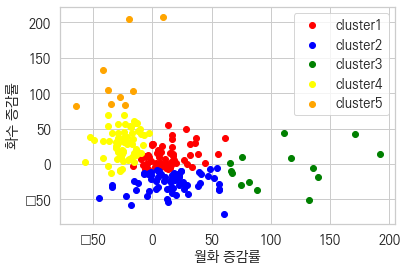

In [128]:
# K-평균 클러스터링 결과 가시화
color=['red','blue','green', 'yellow', 'orange']
labels=['cluster1','cluster2','cluster3', 'cluster4', 'cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
#plt.scatter(Centroids[1,:],Centroids[0,:],s=200,c='pink',label='Centroids')
plt.xlabel('월화 증감률')
plt.ylabel('화수 증감률')
plt.legend()
plt.show()